In [1]:
import numpy as np
import torch
import gif
import matplotlib.pyplot as plt
import pytorch_lightning as pl 
from pathlib import Path
import yaml
import matplotlib.ticker as ticker
import matplotlib.colors as colors

from matplotlib.tri import Triangulation as triang

from scipy.io import loadmat

from scipy.interpolate import LinearNDInterpolator as interp_lin
from core.utils import load_checkpoint

import seaborn

seaborn.set_style("darkgrid")

In [2]:
model_checkpoint_path = Path(r'C:\Users\Kevin\OneDrive - UCB-O365\Documents\Research\QuadConv\lightning_logs\present_qcae_pool\version_1')
data_path = Path(r'C:\Users\Kevin\OneDrive - UCB-O365\Documents\Research\QuadConv\data\ignition_mesh')
model, dataset, locations = load_checkpoint(model_checkpoint_path, data_path)

In [3]:
save_path = model_checkpoint_path / '..' 

G_layer0 = lambda x :  model.encoder.init_layer.G(x)

mid_layer = model.encoder.qcnn

next_func = lambda x : model.decoder.init_layer.G(x)

x = np.linspace(-0.5,0.5,250)
y = np.linspace(-0.5,0.5,250)

Xg,Yg = np.meshgrid(*(x,y))

grid_list = torch.tensor(np.float32(np.vstack((Xg.flatten(), Yg.flatten()))).T)

#print(grid_list)
print(grid_list.shape)

big_eval = next_func(grid_list)

print(big_eval.shape)


torch.Size([62500, 2])
torch.Size([62500, 32, 4])


torch.Size([62500, 1, 1])


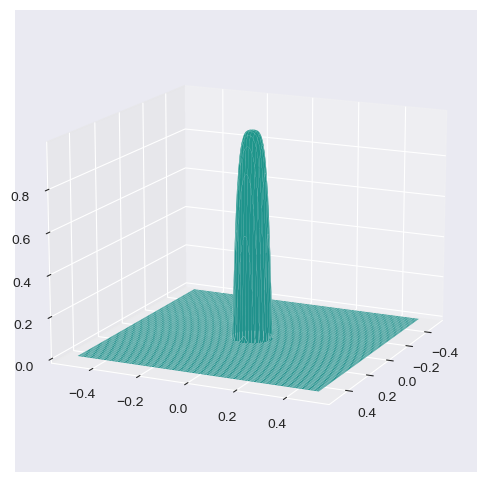

In [4]:
fig_bump, axs_bump = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "3d"})

bump_func = lambda x : model.decoder.init_layer._bump(x)

vir = seaborn.color_palette("viridis", as_cmap=True)

x = np.linspace(-0.5,0.5,250)
y = np.linspace(-0.5,0.5,250)

Xb,Yb = np.meshgrid(*(x,y))

grid_list_b = torch.tensor(np.float32(np.vstack((Xb.flatten(), Yb.flatten()))).T)

bump_z = bump_func(grid_list_b)

print(bump_z.shape)

axs_bump.view_init(15,25)

axs_bump.plot_surface(Xb,Yb, bump_z.reshape(250,250),rstride=3, cstride=3, linewidth=0.05, cmap=vir, vmin=-20, vmax = 20)

(62500,)


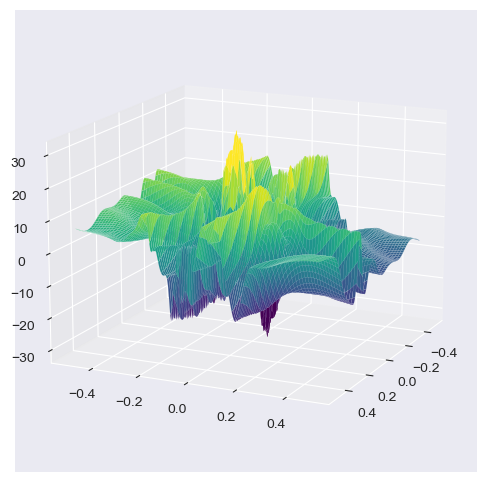

In [5]:
fig_ker, axs_ker = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "3d"})

last_func = lambda x : model.decoder.init_layer.H(x)[:,13,0]

vir = seaborn.color_palette("viridis", as_cmap=True)

x = np.linspace(-0.5,0.5,250)
y = np.linspace(-0.5,0.5,250)

Xb,Yb = np.meshgrid(*(x,y))

grid_list_b = torch.tensor(np.float32(np.vstack((Xb.flatten(), Yb.flatten()))).T)

bump_z = last_func(grid_list_b).detach().numpy()

print(bump_z.shape)

axs_ker.view_init(15,25)

axs_ker.plot_surface(Xb,Yb, bump_z.reshape(250,250),rstride=3, cstride=3, linewidth=0.05, cmap=vir, vmin=-20, vmax = 20)

(62500,)


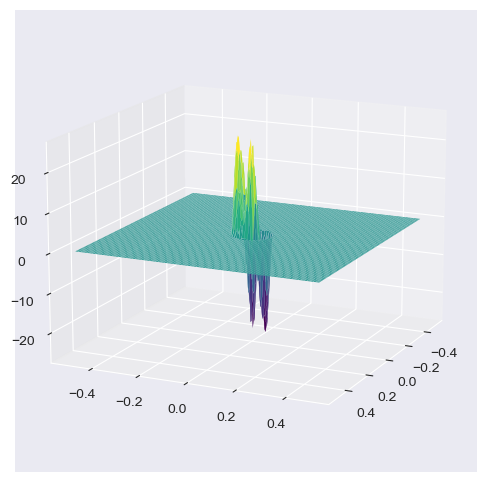

In [6]:
fig_ker, axs_ker = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "3d"})

last_func = lambda x : model.decoder.init_layer.G(x)[:,13,0]

vir = seaborn.color_palette("viridis", as_cmap=True)

x = np.linspace(-0.5,0.5,250)
y = np.linspace(-0.5,0.5,250)

Xb,Yb = np.meshgrid(*(x,y))

grid_list_b = torch.tensor(np.float32(np.vstack((Xb.flatten(), Yb.flatten()))).T)

bump_z = last_func(grid_list_b).detach().numpy()

print(bump_z.shape)

axs_ker.view_init(15,25)

axs_ker.plot_surface(Xb,Yb, bump_z.reshape(250,250),rstride=3, cstride=3, linewidth=0.05, cmap=vir, vmin=-20, vmax = 20)

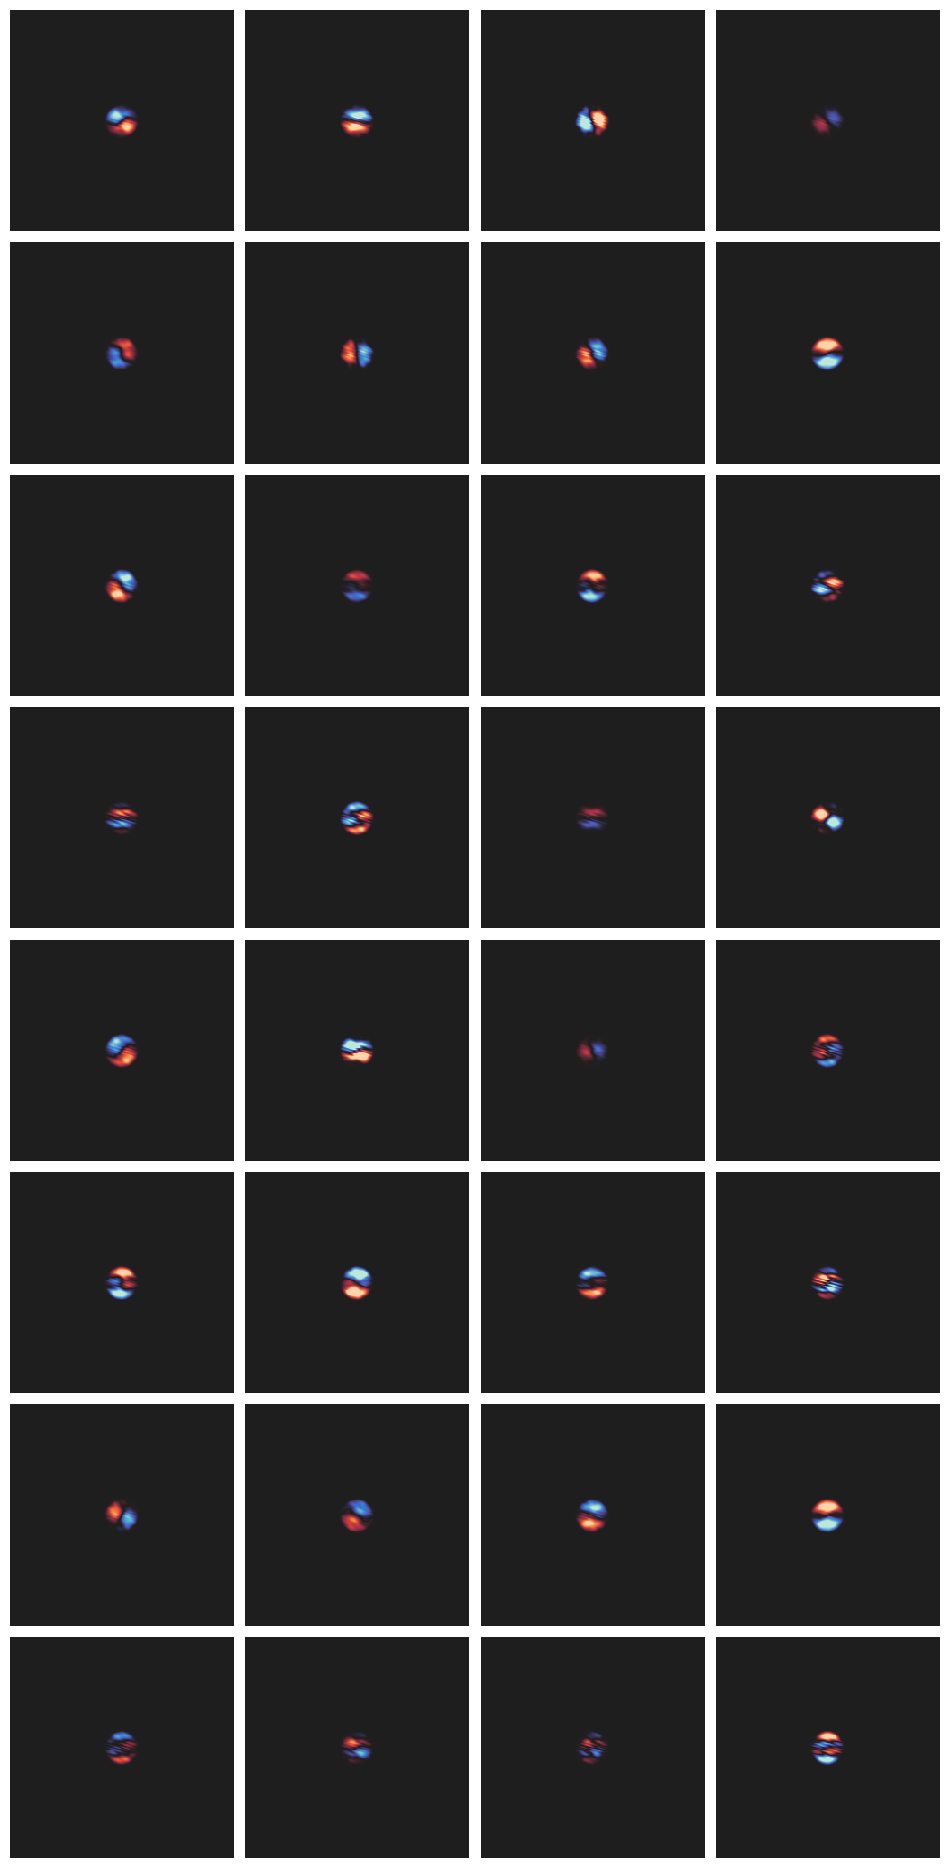

In [11]:

fig, axs = plt.subplots(8, 4, figsize=(12, 24))

my_map = seaborn.color_palette("icefire", as_cmap=True)

big_eval = next_func(grid_list)


# Flatten the axis array
axs = axs.ravel()

# Loop over the images and plot them on the corresponding axis
for i in range(32):
    C = big_eval[:,i,0].detach().cpu().numpy().reshape(250,250)
    axs[i].pcolor(Xg,Yg, C, vmin=-25, vmax=25,cmap=my_map)
    axs[i].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.05, wspace=0.05)

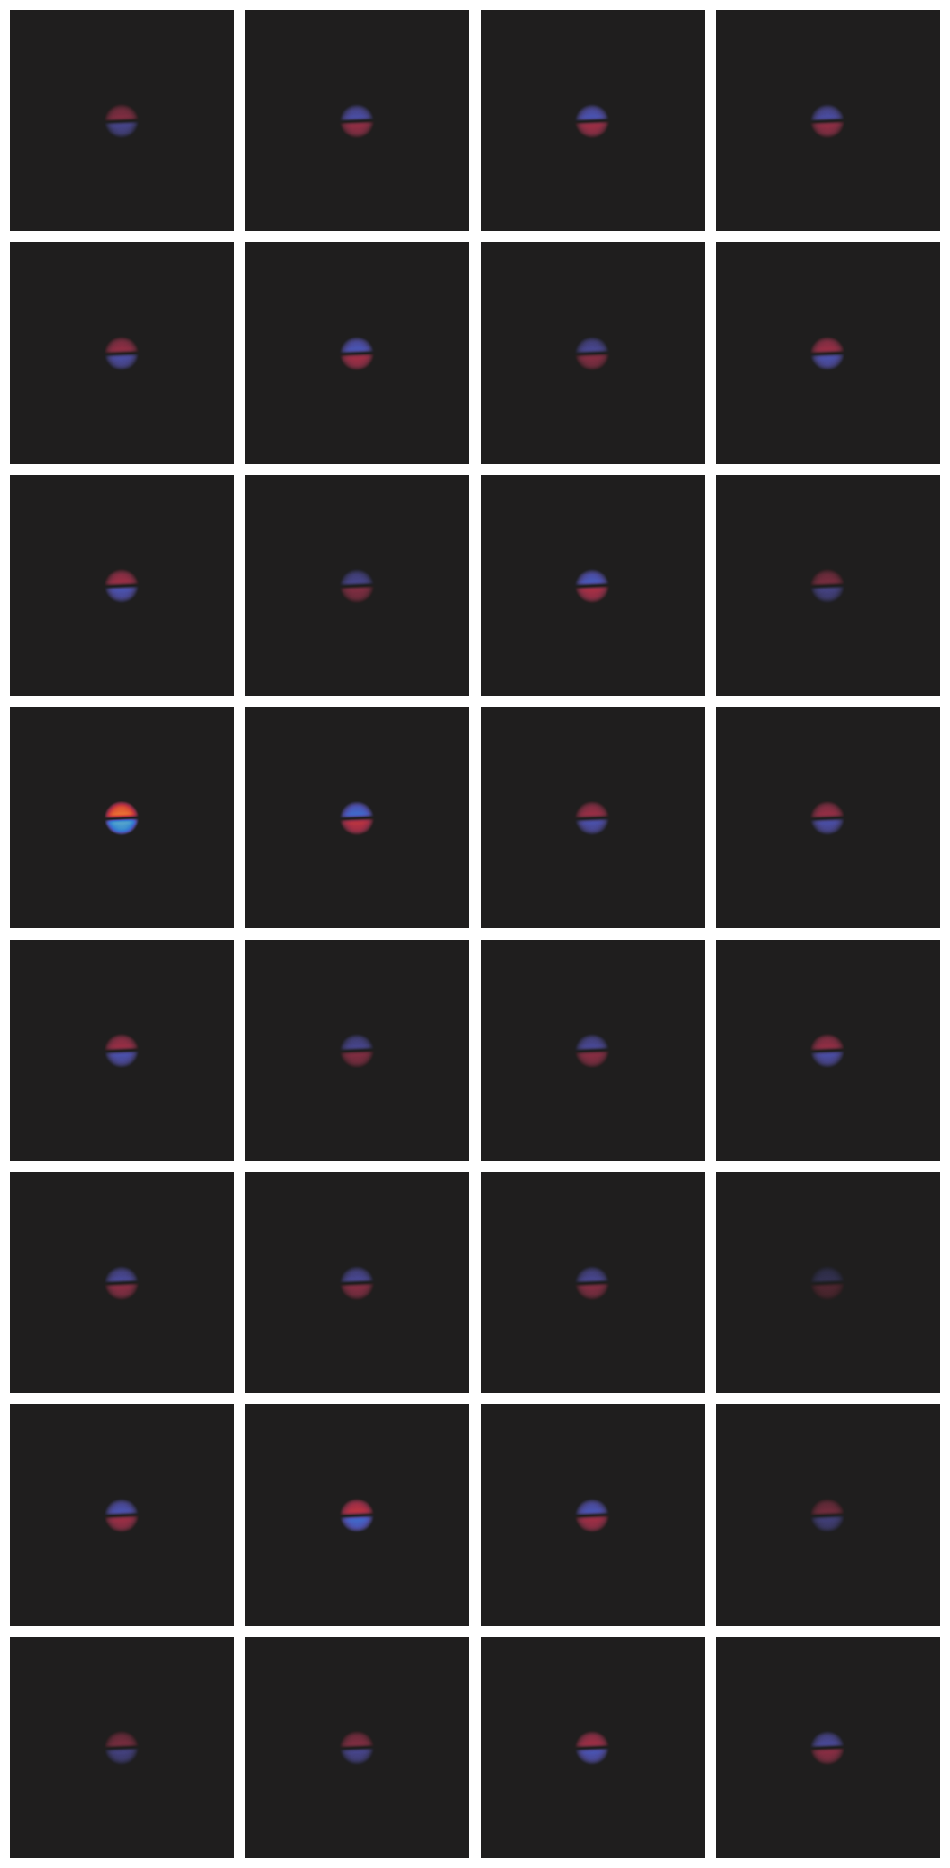

In [9]:

fig, axs = plt.subplots(8, 4, figsize=(12, 24))

my_map = seaborn.color_palette("icefire", as_cmap=True)


big_eval = G_layer0(grid_list)

# Flatten the axis array
axs = axs.ravel()

# Loop over the images and plot them on the corresponding axis
for i in range(32):
    C = big_eval[:,0,i].detach().cpu().numpy().reshape(250,250)
    axs[i].pcolor(Xg,Yg, C, vmin=-25, vmax=25,cmap=my_map)
    axs[i].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.05, wspace=0.05)



In [ ]:
next_func = lambda x : model.decoder.init_layer._bump(x)

